In [1]:
#IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#!pip install plotly
#!pip install cufflinks

In [3]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__)

4.14.1


In [4]:
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

In [5]:
df_world = pd.read_csv('WHO-COVID-19-global-data.csv')

In [6]:
df_world.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-02-24,AF,Afghanistan,EMRO,5,5,0,0
1,2020-02-25,AF,Afghanistan,EMRO,0,5,0,0
2,2020-02-26,AF,Afghanistan,EMRO,0,5,0,0
3,2020-02-27,AF,Afghanistan,EMRO,0,5,0,0
4,2020-02-28,AF,Afghanistan,EMRO,0,5,0,0


In [7]:
df_world.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42457 entries, 0 to 42456
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Date_reported       42457 non-null  object
 1    Country_code       42268 non-null  object
 2    Country            42457 non-null  object
 3    WHO_region         42457 non-null  object
 4    New_cases          42457 non-null  int64 
 5    Cumulative_cases   42457 non-null  int64 
 6    New_deaths         42457 non-null  int64 
 7    Cumulative_deaths  42457 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 2.6+ MB


In [8]:
df_world.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,42457.000000,4.245700e+04,42457.000000,42457.000000
mean,707.909414,4.767299e+04,22.220906,1989.622889
std,4349.808983,2.966913e+05,129.209237,10592.017718
min,-8261.000000,1.000000e+00,-514.000000,0.000000
25%,0.000000,8.500000e+01,0.000000,1.000000
50%,11.000000,1.066000e+03,0.000000,20.000000
75%,158.000000,1.027700e+04,3.000000,221.000000
max,97894.000000,6.571119e+06,6409.000000,195638.000000


In [9]:
df_world_copy = df_world.copy()

In [10]:
df_india = df_world_copy[df_world_copy[' Country'] == 'India']

In [11]:
df_india.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
18162,2020-01-30,IN,India,SEARO,5,5,0,0
18163,2020-01-31,IN,India,SEARO,0,5,0,0
18164,2020-02-01,IN,India,SEARO,0,5,0,0
18165,2020-02-02,IN,India,SEARO,1,6,0,0
18166,2020-02-03,IN,India,SEARO,1,7,0,0


In [12]:
df_india.drop(' Country_code',axis=1,inplace=True)
df_india.drop(' Country',axis=1,inplace=True)
df_india.drop(' WHO_region',axis=1,inplace=True)

In [13]:
df_india = df_india.reset_index()

In [14]:
df_india.head()

,index,Date_reported,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,18162,2020-01-30,5,5,0,0
1,18163,2020-01-31,0,5,0,0
2,18164,2020-02-01,0,5,0,0
3,18165,2020-02-02,1,6,0,0
4,18166,2020-02-03,1,7,0,0


In [15]:
df_india.drop('index',axis=1,inplace=True)

In [16]:
df_india.head()

,Date_reported,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-30,5,5,0,0
1,2020-01-31,0,5,0,0
2,2020-02-01,0,5,0,0
3,2020-02-02,1,6,0,0
4,2020-02-03,1,7,0,0


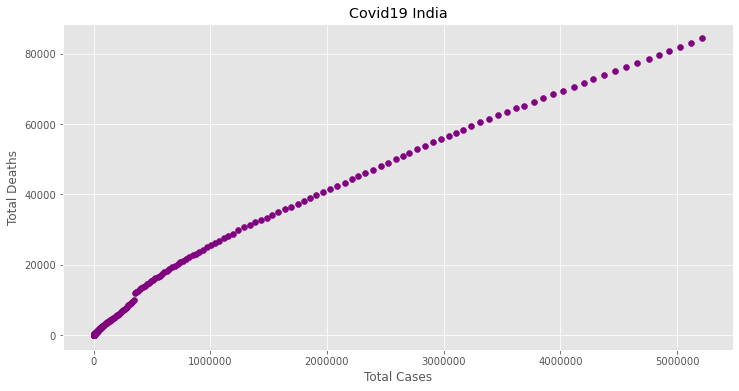

In [17]:
plt.style.use('ggplot')
plt.figure(figsize=(12,6))
plt.xlabel('Total Cases',fontsize=12)
plt.ylabel('Total Deaths',fontsize=12)
plt.title("Covid19 India")
ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_scientific(False)
plt.scatter(x=' Cumulative_cases',y=' Cumulative_deaths',data=df_india,c='purple')

In [18]:
def month_name (number):
    if number == 1:
        return "January"
    elif number == 2:
        return "February"
    elif number == 3:
        return "March"
    elif number == 4:
        return "April"
    elif number == 5:
        return "May"
    elif number == 6:
        return "June"
    elif number == 7:
        return "July"
    elif number == 8:
        return "August"
    elif number == 9:
        return "September"
    elif number == 10:
        return "October"
    elif number == 11:
        return "November"
    elif number == 12:
        return "December"

In [19]:
empty_list = []
for x in df_india['Date_reported']:
    y = int(x.split(sep='-')[1])
    y = month_name(y)
    empty_list.append(y)

In [20]:
array = np.array(empty_list)

In [21]:
df_india_month = pd.DataFrame(data=array,columns=['Month'])

In [22]:
df_india_final = df_india.merge(df_india_month, left_index=True, right_index=True)

In [23]:
count = 1
week_count = 1
def week_counter(y):
    global count
    global week_count
    if(count <= 7):
        count = count + 1
        y = week_count
        return y

    else:
        count = 2
        week_count = week_count+1
        y = week_count
        return y 

In [24]:
empty_list_week = []
for x in df_india['Date_reported']:
    y = int(x.split(sep='-')[2])
    y = week_counter(y)
    empty_list_week.append(y)

In [25]:
array = np.array(empty_list_week)
df_india_week = pd.DataFrame(data=array,columns=['Week number'])

In [26]:
df_india_final = df_india_final.merge(df_india_week, left_index=True, right_index=True)

In [27]:
df_india_final

,Date_reported,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Month,Week number
0,2020-01-30,5,5,0,0,January,1
1,2020-01-31,0,5,0,0,January,1
2,2020-02-01,0,5,0,0,February,1
3,2020-02-02,1,6,0,0,February,1
4,2020-02-03,1,7,0,0,February,1
...,...,...,...,...,...,...,...
228,2020-09-14,92071,4846427,1136,79722,September,33
229,2020-09-15,83809,4930236,1054,80776,September,33
230,2020-09-16,90123,5020359,1290,82066,September,33
231,2020-09-17,97894,5118253,1132,83198,September,34


<AxesSubplot:title={'center':'Covid19 India'}, xlabel='Month', ylabel=' Cumulative_cases'>

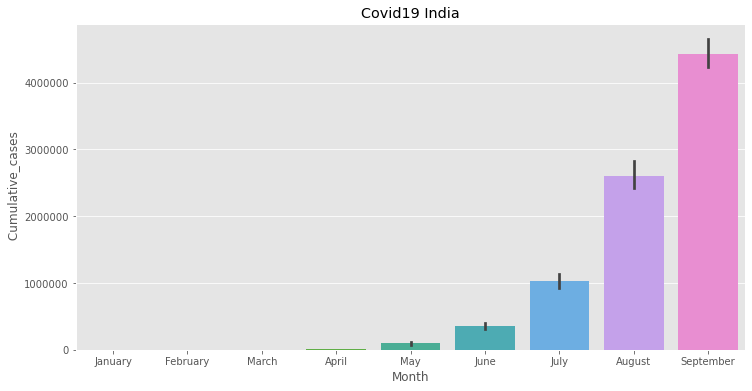

In [28]:
plt.figure(figsize=(12,6))
ax = plt.gca()
plt.title("Covid19 India")
ax.get_yaxis().get_major_formatter().set_scientific(False)
sns.barplot(x='Month',y=' Cumulative_cases',data=df_india_final)

<AxesSubplot:title={'center':'Covid19 India'}, xlabel='Month', ylabel=' Cumulative_cases'>

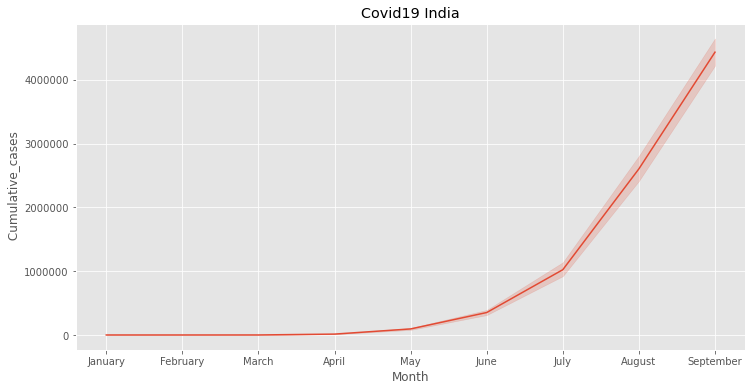

In [29]:
plt.figure(figsize=(12,6))
ax = plt.gca()
plt.title("Covid19 India")
ax.get_yaxis().get_major_formatter().set_scientific(False)
sns.lineplot(x='Month',y=' Cumulative_cases',sort=False,data=df_india_final)

<AxesSubplot:title={'center':'Covid19 India'}, xlabel='Month', ylabel=' Cumulative_deaths'>

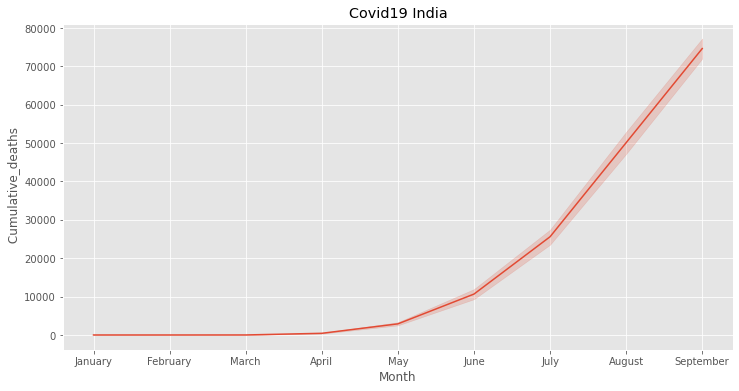

In [30]:
plt.figure(figsize=(12,6))
ax = plt.gca()
plt.title("Covid19 India")
ax.get_yaxis().get_major_formatter().set_scientific(False)
sns.lineplot(x='Month',y=' Cumulative_deaths',sort=False,data=df_india_final)

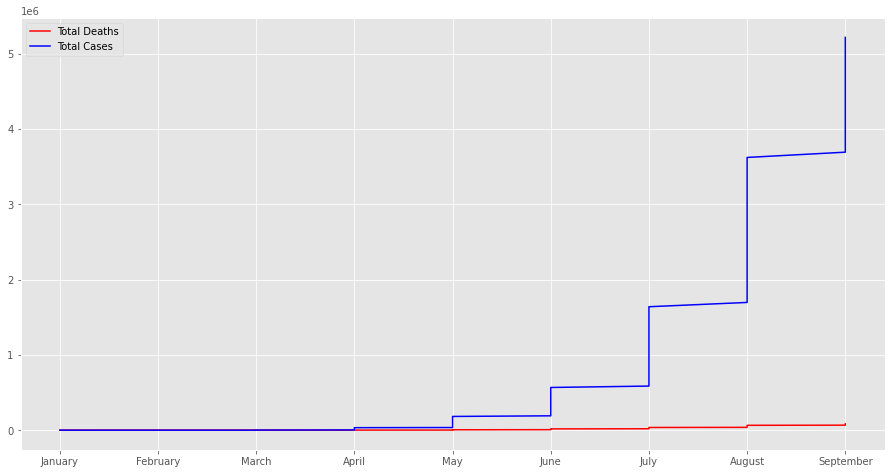

In [31]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_axes([0,0,1,1])
ax.plot(df_india_final['Month'], df_india_final[' Cumulative_deaths'],color = 'red',label="Total Deaths")
ax.plot(df_india_final['Month'], df_india_final[' Cumulative_cases'],color='blue',label="Total Cases")
ax.legend(loc=0)

In [32]:
df_india_final.iplot(kind='scatter',x=' Cumulative_cases',y=' Cumulative_deaths',mode='markers',size=10,title="Covid19 India",
                    xTitle="Total Cases",yTitle="Total Death")

In [33]:
df_india_final.iplot(kind='bar',x='Month',y=' Cumulative_cases',mode='markers',size=10,title="Covid19 India",
                    xTitle="Month",yTitle="Total Cases")

In [34]:
df_india_final.iplot(kind='bar',x='Month',y=' Cumulative_deaths',mode='markers',size=10,title="Covid19 India",
                    xTitle="Month",yTitle="Total Death")

<AxesSubplot:title={'center':'Covid19 Cases in India'}, xlabel='Week number', ylabel=' Cumulative_cases'>

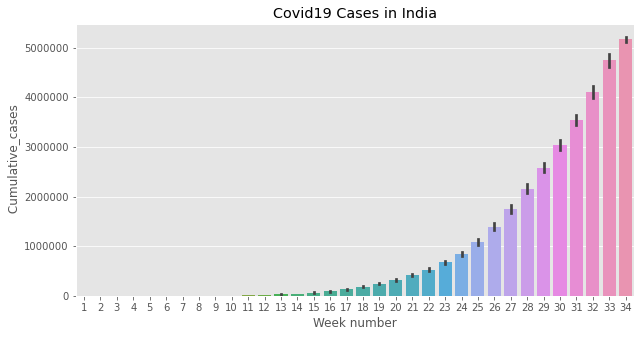

In [35]:
plt.figure(figsize=(10,5))
plt.title("Covid19 Cases in India")
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
sns.barplot(x='Week number',y=' Cumulative_cases',data=df_india_final)

In [36]:
df_india_final.iplot(kind='bar',x='Week number',y=' Cumulative_deaths',mode='markers',size=10,title="Covid19 India",
                    xTitle="Week",yTitle="Total Death")

In [37]:
df_india_final.iplot(kind='bar',x='Week number',y=' Cumulative_cases',mode='markers',size=10,title="Covid19 India",
                    xTitle="Week",yTitle="Total cases")

In [38]:
#!pip install chart_studio

In [39]:
import chart_studio.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [40]:
init_notebook_mode(connected=True) 

In [41]:
df_today = df_world[df_world['Date_reported'] == '2020-09-18']

In [42]:
df_today.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
207,2020-09-18,AF,Afghanistan,EMRO,11,38883,1,1437
401,2020-09-18,AL,Albania,EURO,132,11948,4,347
608,2020-09-18,DZ,Algeria,AFRO,228,49194,9,1654
808,2020-09-18,AD,Andorra,EURO,0,1483,0,53
990,2020-09-18,AO,Angola,AFRO,114,3789,1,144


In [43]:
data = dict(
        type = 'choropleth',
        colorscale = 'Tealgrn',
        locations = df_today[' Country'],
        z = df_today[' Cumulative_cases'],
        text = df_today[' Country'],
        locationmode = "country names",
        colorbar = {'title' : 'Covid19 Cases'},
      ) 

In [44]:
layout = dict(
    title = 'Covid19 cases(14 Sept 2020)',
    geo = dict(
        showframe = False,
        projection = {'type':'orthographic'}
    )
)

In [45]:
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)

In [46]:
data = dict(
        type = 'choropleth',
        colorscale = 'Reds',
        locations = df_today[' Country'],
        z = df_today[' Cumulative_deaths'],
        text = df_today[' Country'],
        locationmode = "country names",
        colorbar = {'title' : 'Covid19 Total Deaths'},
      ) 
layout = dict(
    title = 'Covid19 Total Deaths (14 Sept 2020)',
    geo = dict(
        showframe = False,
        projection = {'type':'orthographic'}
    )
)
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)

In [47]:
empty_list_mn = []
for x in df_india['Date_reported']:
    y = int(x.split('-')[1])
    empty_list_mn.append(y)

In [48]:
array_mn = np.array(empty_list_mn)

In [49]:
df_india_mn = pd.DataFrame(data=array_mn,columns=['Month number'])

In [50]:
df_india_final = df_india_final.merge(df_india_mn, left_index=True, right_index=True)

In [51]:
df_india_final.head()

,Date_reported,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Month,Week number,Month number
0,2020-01-30,5,5,0,0,January,1,1
1,2020-01-31,0,5,0,0,January,1,1
2,2020-02-01,0,5,0,0,February,1,2
3,2020-02-02,1,6,0,0,February,1,2
4,2020-02-03,1,7,0,0,February,1,2


In [52]:
df_india_final.tail()

,Date_reported,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Month,Week number,Month number
228,2020-09-14,92071,4846427,1136,79722,September,33,9
229,2020-09-15,83809,4930236,1054,80776,September,33,9
230,2020-09-16,90123,5020359,1290,82066,September,33,9
231,2020-09-17,97894,5118253,1132,83198,September,34,9
232,2020-09-18,96424,5214677,1174,84372,September,34,9


In [53]:
df_india_final.columns

Index(['Date_reported', ' New_cases', ' Cumulative_cases', ' New_deaths',
       ' Cumulative_deaths', 'Month', 'Week number', 'Month number'],
      dtype='object')

In [54]:
df_india_final_copy = df_india_final.copy()

In [55]:
df_wc = df_world.copy()

In [56]:
empty_list_mnw = []
for x in df_wc['Date_reported']:
    y = int(x.split('-')[1])
    empty_list_mnw.append(y)

In [57]:
array_mnw = np.array(empty_list_mnw)
df_mnw = pd.DataFrame(data=array_mnw,columns=['Month number'])
df_wc = df_wc.merge(df_mnw, left_index=True, right_index=True)

In [58]:
df_india_final_copy.to_csv(r'C:\Users\iNDIA\Programming\Python project\Covid-19 Prediction\Covid19 India.csv')